In [1]:
import pandas as pd
import numpy as np
import re

import time
import sys

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn.widgets import color_palette
import matplotlib.gridspec as gridspec

## 1. Data preparing

In [5]:
df_base = pd.read_csv('data/df_full.csv').drop(columns = ['Unnamed: 0'])

#locate period of analysis 
min_list = [min(df_base[df_base.city == 'moscow'].Year),
            min(df_base[df_base.city == 'spb'].Year),
            min(df_base[df_base.city == 'kazan'].Year) ]

max_list = [max(df_base.Year[df_base['city'] == 'moscow']),
            max(df_base.Year[df_base['city'] == 'spb']),
            max(df_base.Year[df_base['city'] == 'kazan']) ]



df = df_base[(df_base['Year'] >= max(min_list)) &
             (df_base['Year'] < min(max_list)) &
             (df_base['Flats'] < 10000) &
             (df_base['Entrance'] < 50) &
             (df_base['Height'] < 80) ]
df.reset_index(drop= True , inplace= True )

In [6]:
print(f'minimal year is {max(min_list)}, maximum year is {min(max_list)}')

minimal year is 1901, maximum year is 2021


In [7]:
len(df)

50015

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50015 entries, 0 to 50014
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          50015 non-null  object 
 1   Year             50015 non-null  int64  
 2   Flats            50015 non-null  int64  
 3   Entrance         50015 non-null  int64  
 4   Height           50015 non-null  int64  
 5   Square           50015 non-null  float64
 6   Latitude         50015 non-null  float64
 7   Longitude        50015 non-null  float64
 8   city             50015 non-null  object 
 9   Flats_per_floor  50015 non-null  float64
 10  Street           50015 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 4.2+ MB


In [10]:
df.sample(n=5)

Address  Year  Flats  Entrance  Height  \
44246   пр-кт римского-корсакова, 101 литер а  1917     12         2       5   
8506              ш. варшавское, 131 корпус 1  1981    111         1      16   
2392           3-й новомихалковский проезд, 5  1958     48         4       5   
48004               ул. интернациональная, 14  1968     16         2       2   
35054  пр-кт народного ополчения, 207 литер а  1970    139         7       5   

        Square   Latitude  Longitude    city  Flats_per_floor  \
44246   915.00  59.918873  30.281867     spb         1.200000   
8506   5279.30  55.605236  37.609335  moscow         6.937500   
2392   2677.10  55.839588  37.541350  moscow         2.400000   
48004   653.50  55.809327  49.269449   kazan         4.000000   
35054  6894.48  59.825818  30.181166     spb         3.971429   

                            Street  
44246     пр-кт римского-корсакова  
8506                 ш. варшавское  
2392   3-й новомихалковский проезд  
48004        ул. интернациональная  
35054    пр-кт народного ополчения

## 2. Statistic analysis visualization

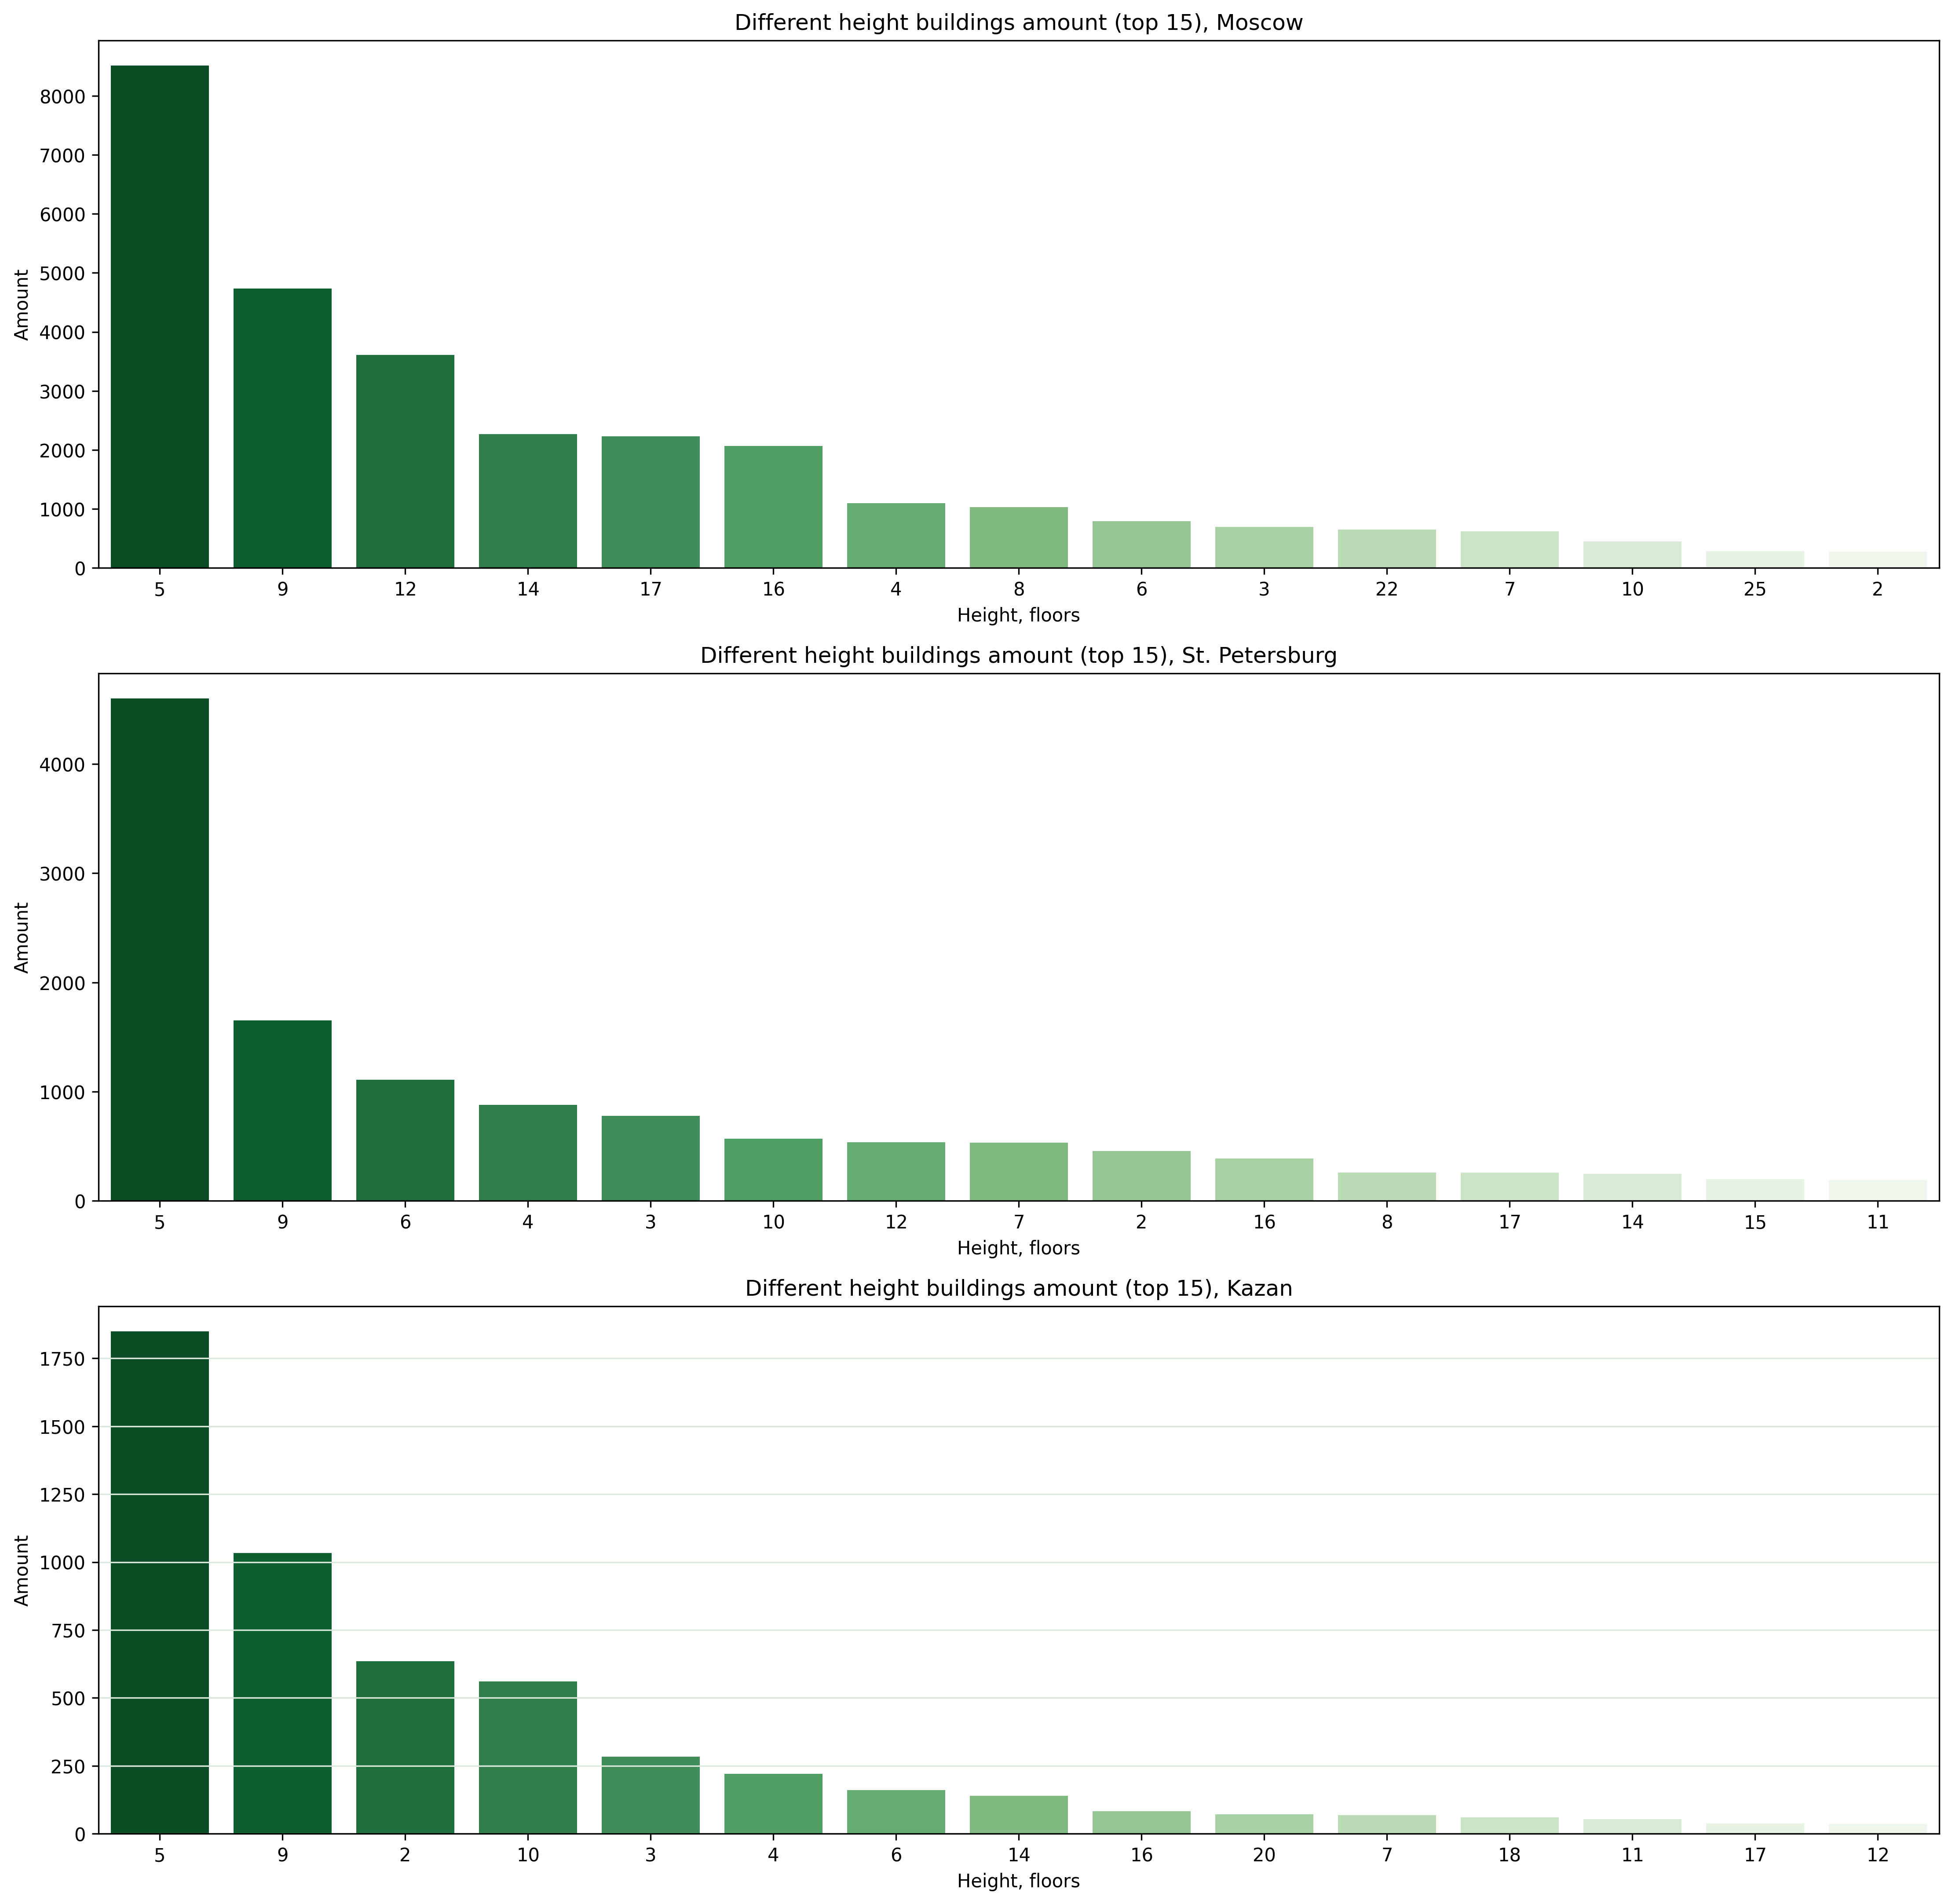

In [12]:
# list of same height buildings amount for Moscow
moscow_height_list_a = df.Height[df['city'] == 'moscow'].value_counts()
moscow_height_list_names = list(map(str, moscow_height_list_a.index))
moscow_height_list_amount = moscow_height_list_a.values

# list of same height buildings amount for SPB
spb_height_list_a = df.Height[df['city'] == 'spb'].value_counts()
spb_height_list_names = list(map(str, spb_height_list_a.index))
spb_height_list_amount = spb_height_list_a.values

# list of same height buildings amount for Kazan
kazan_height_list_a = df.Height[df['city'] == 'kazan'].value_counts()
kazan_height_list_names = list(map(str, kazan_height_list_a.index))
kazan_height_list_amount = kazan_height_list_a.values

# 3 subplots graph
gs = gridspec.GridSpec(3, 1)
plt.figure(figsize=(18, 18), dpi = 300)

ax = plt.subplot(gs[0,0])
sns.barplot(x = moscow_height_list_names[:15], y = moscow_height_list_amount[:15],
            palette = 'Greens_r')
plt.title('Different height buildings amount (top 15), Moscow')
plt.xlabel('Height, floors')
plt.ylabel('Amount')

ax = plt.subplot(gs[1,0])
sns.barplot(x = spb_height_list_names[:15], y = spb_height_list_amount[:15],
            palette = 'Greens_r')
plt.title('Different height buildings amount (top 15), St. Petersburg')
plt.xlabel('Height, floors')
plt.ylabel('Amount')

ax = plt.subplot(gs[2,0])
sns.barplot(x = kazan_height_list_names[:15], y = kazan_height_list_amount[:15],
            palette = 'Greens_r')
plt.title('Different height buildings amount (top 15), Kazan')
plt.xlabel('Height, floors')
plt.ylabel('Amount')

plt.grid(axis = 'y', color = '#dce8dc')
plt.savefig('pictures/summary_plot_1.png')
plt.show()

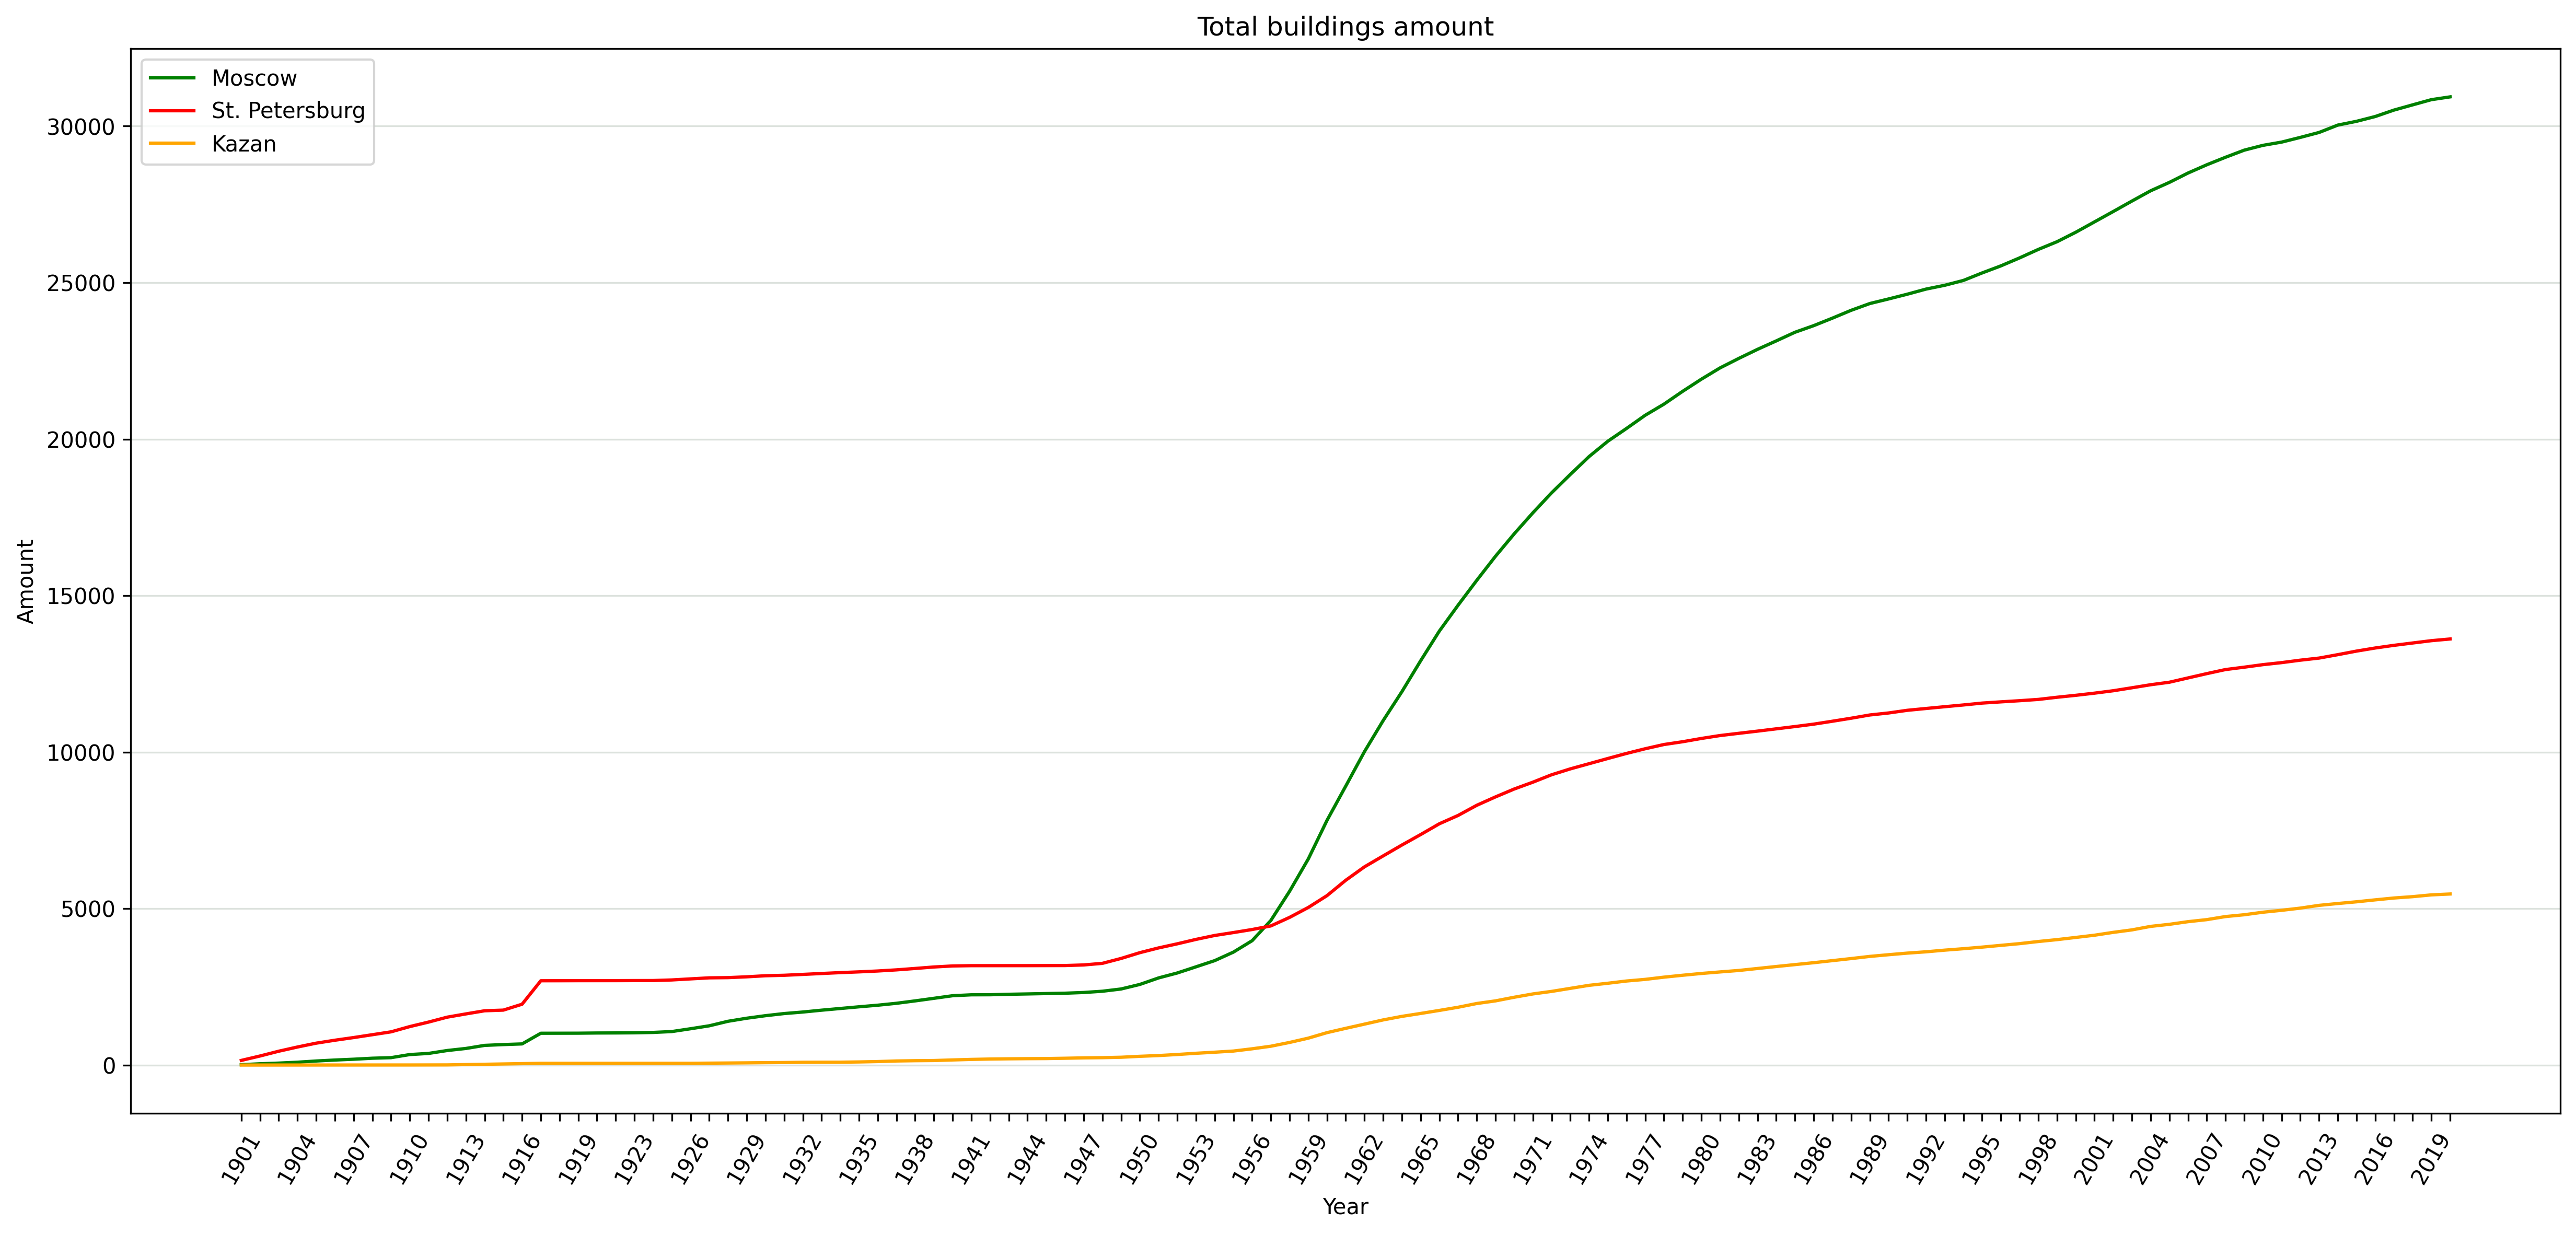

In [13]:
# Moscow
# total buildings amount by years
moscow_years_list_a = df.Year[df['city'] == 'moscow'].value_counts()
moscow_years_list_sorted = moscow_years_list_a.sort_index(ascending = True)
moscow_total_years = moscow_years_list_sorted.index
moscow_total_values = []
# collect list of total buildings by every year
for i in range(len(moscow_total_years)):
  if i == 0:
    moscow_total_values.append(moscow_years_list_sorted.values[i])
  else:
    el = moscow_total_values[i-1] + moscow_years_list_sorted.values[i]
    moscow_total_values.append(el)

moscow_total_years_names = list(map(str, moscow_years_list_sorted.index))

# St. Petersburg
# total buildings amount by years
spb_years_list_a = df.Year[df['city'] == 'spb'].value_counts()
spb_years_list_sorted = spb_years_list_a.sort_index(ascending = True)
spb_total_years = spb_years_list_sorted.index
spb_total_values = []
# collect list of total buildings by every year
for i in range(len(spb_total_years)):
  if i == 0:
    spb_total_values.append(spb_years_list_sorted.values[i])
  else:
    el = spb_total_values[i-1] + spb_years_list_sorted.values[i]
    spb_total_values.append(el)

spb_total_years_names = list(map(str, spb_years_list_sorted.index))

# Kazan
# total buildings amount by years
kazan_years_list_a = df.Year[df['city'] == 'kazan'].value_counts()
kazan_years_list_sorted = kazan_years_list_a.sort_index(ascending = True)
kazan_total_years = kazan_years_list_sorted.index
kazan_total_values = []
# collect list of total buildings by every year
for i in range(len(kazan_total_years)):
  if i == 0:
    kazan_total_values.append(kazan_years_list_sorted.values[i])
  else:
    el = kazan_total_values[i-1] + kazan_years_list_sorted.values[i]
    kazan_total_values.append(el)

kazan_total_years_names = list(map(str, kazan_years_list_sorted.index))


fig, ax = plt.subplots(figsize=(20, 9), dpi = 300)

sns.lineplot(x = moscow_total_years_names, y = moscow_total_values,
            color = 'green', label= 'Moscow')
sns.lineplot(x = spb_total_years_names, y = spb_total_values,
            color = 'red', label= 'St. Petersburg')
sns.lineplot(x = kazan_total_years_names, y = kazan_total_values,
            color = 'orange', label= 'Kazan')

plt.title('Total buildings amount')
plt.xlabel('Year')
plt.xticks(rotation=60)
plt.ylabel('Amount')
plt.grid(axis = 'y', color = '#dce2dd')
# specify number of ticks on x-axis
every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.savefig('pictures/summary_plot_2.png')
plt.show()

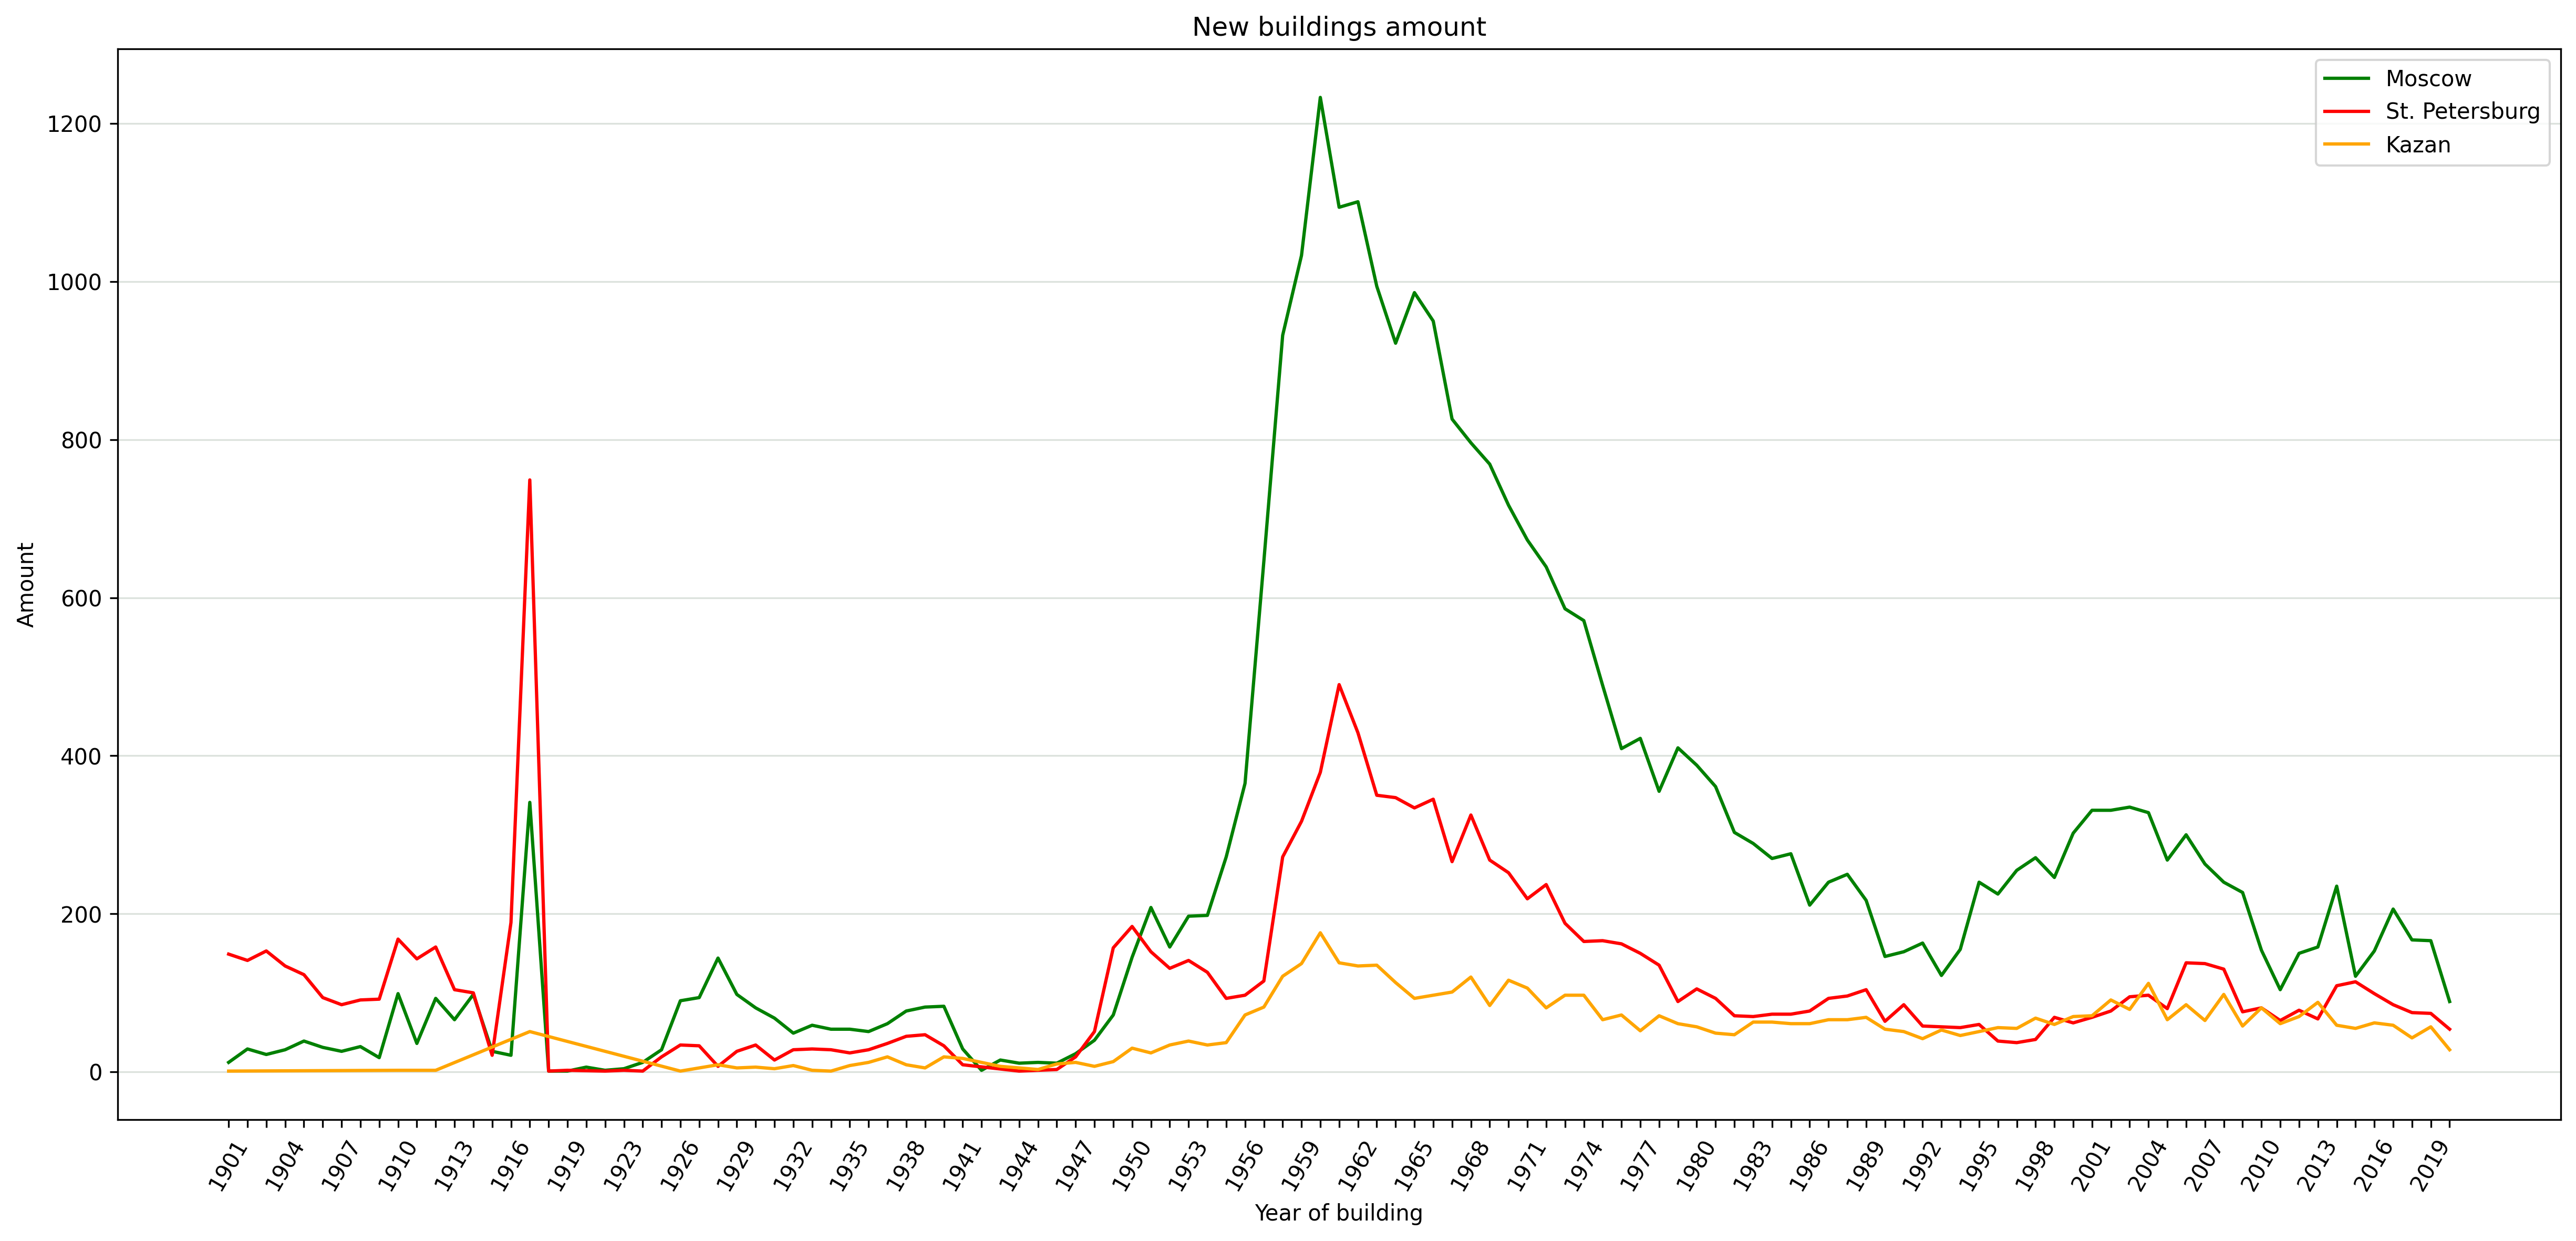

In [14]:
# buildings by year distribution
# Moscow
moscow_years_list_names = list(map(str, moscow_years_list_sorted.index))
moscow_years_list_amount = moscow_years_list_sorted.values

# St Petersburg
spb_years_list_names = list(map(str, spb_years_list_sorted.index))
spb_years_list_amount = spb_years_list_sorted.values

# Kazan
kazan_years_list_names = list(map(str, kazan_years_list_sorted.index))
kazan_years_list_amount = kazan_years_list_sorted.values

fig, ax = plt.subplots(figsize=(20, 9), dpi = 300)

sns.lineplot(x = moscow_years_list_names, y = moscow_years_list_amount,
            color = 'green', label= 'Moscow')
sns.lineplot(x = spb_years_list_names, y = spb_years_list_amount,
            color = 'red', label= 'St. Petersburg')
sns.lineplot(x = kazan_years_list_names, y = kazan_years_list_amount,
            color = 'orange', label= 'Kazan')

plt.title('New buildings amount')
plt.xlabel('Year of building')
plt.xticks(rotation=60)
plt.ylabel('Amount')
plt.grid(axis = 'y', color = '#dce2dd')
# specify number of ticks on x-axis
every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.savefig('pictures/summary_plot_3.png')
plt.show()

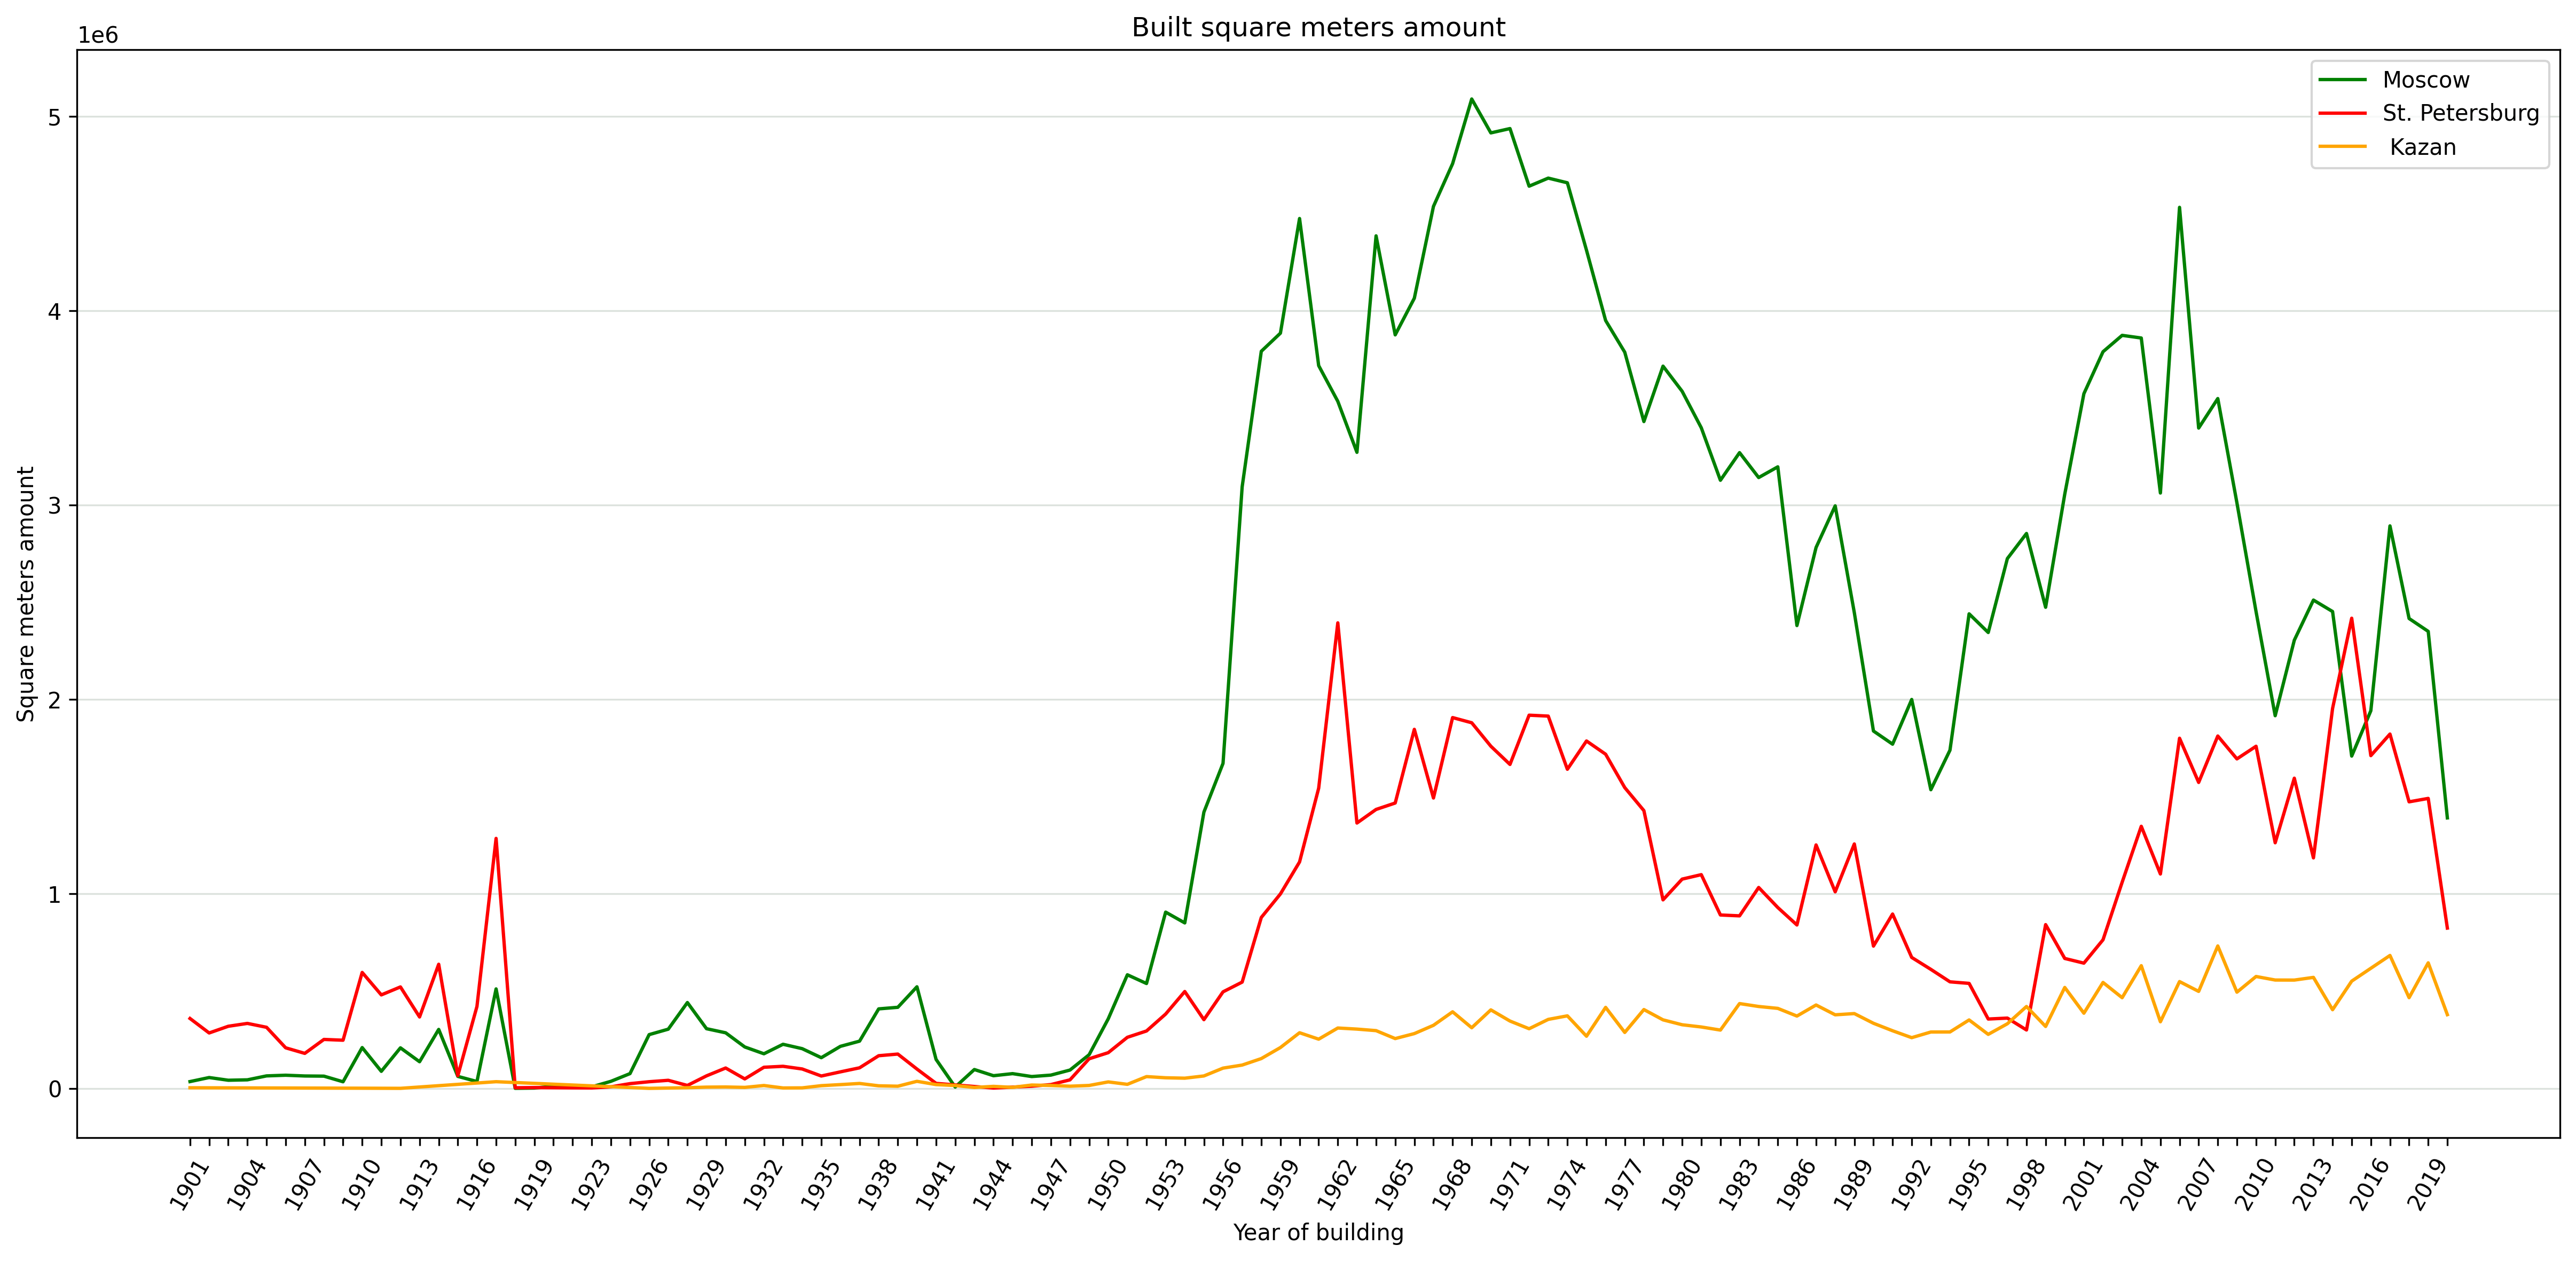

In [16]:
# square by year distribution

# Moscow
moscow_square_years_list = []
for year in moscow_years_list_names:
  sq_sum = sum(df[df.city == 'moscow'].Square.loc[df['Year'] == int(year)])
  moscow_square_years_list.append(sq_sum)

# St Petersburg
spb_square_years_list = []
for year in spb_years_list_names:
  sq_sum = sum(df[df.city == 'spb'].Square.loc[df['Year'] == int(year)])
  spb_square_years_list.append(sq_sum)

# Kazan
kazan_square_years_list = []
for year in kazan_years_list_names:
  sq_sum = sum(df[df.city == 'kazan'].Square.loc[df['Year'] == int(year)])
  kazan_square_years_list.append(sq_sum)

fig, ax = plt.subplots(figsize=(20, 9), dpi = 300)

sns.lineplot(x = moscow_years_list_names, y = moscow_square_years_list,
            color = 'green', label= 'Moscow')
sns.lineplot(x = spb_years_list_names, y = spb_square_years_list,
            color = 'red', label= 'St. Petersburg')
sns.lineplot(x = kazan_years_list_names, y = kazan_square_years_list,
            color = 'orange', label= ' Kazan')

plt.title('Built square meters amount')
plt.xlabel('Year of building')
plt.xticks(rotation=60)
plt.ylabel('Square meters amount')
plt.grid(axis = 'y', color = '#dce2dd')
# specify number of ticks on x-axis
every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.savefig('pictures/summary_plot_4.png')
plt.show()

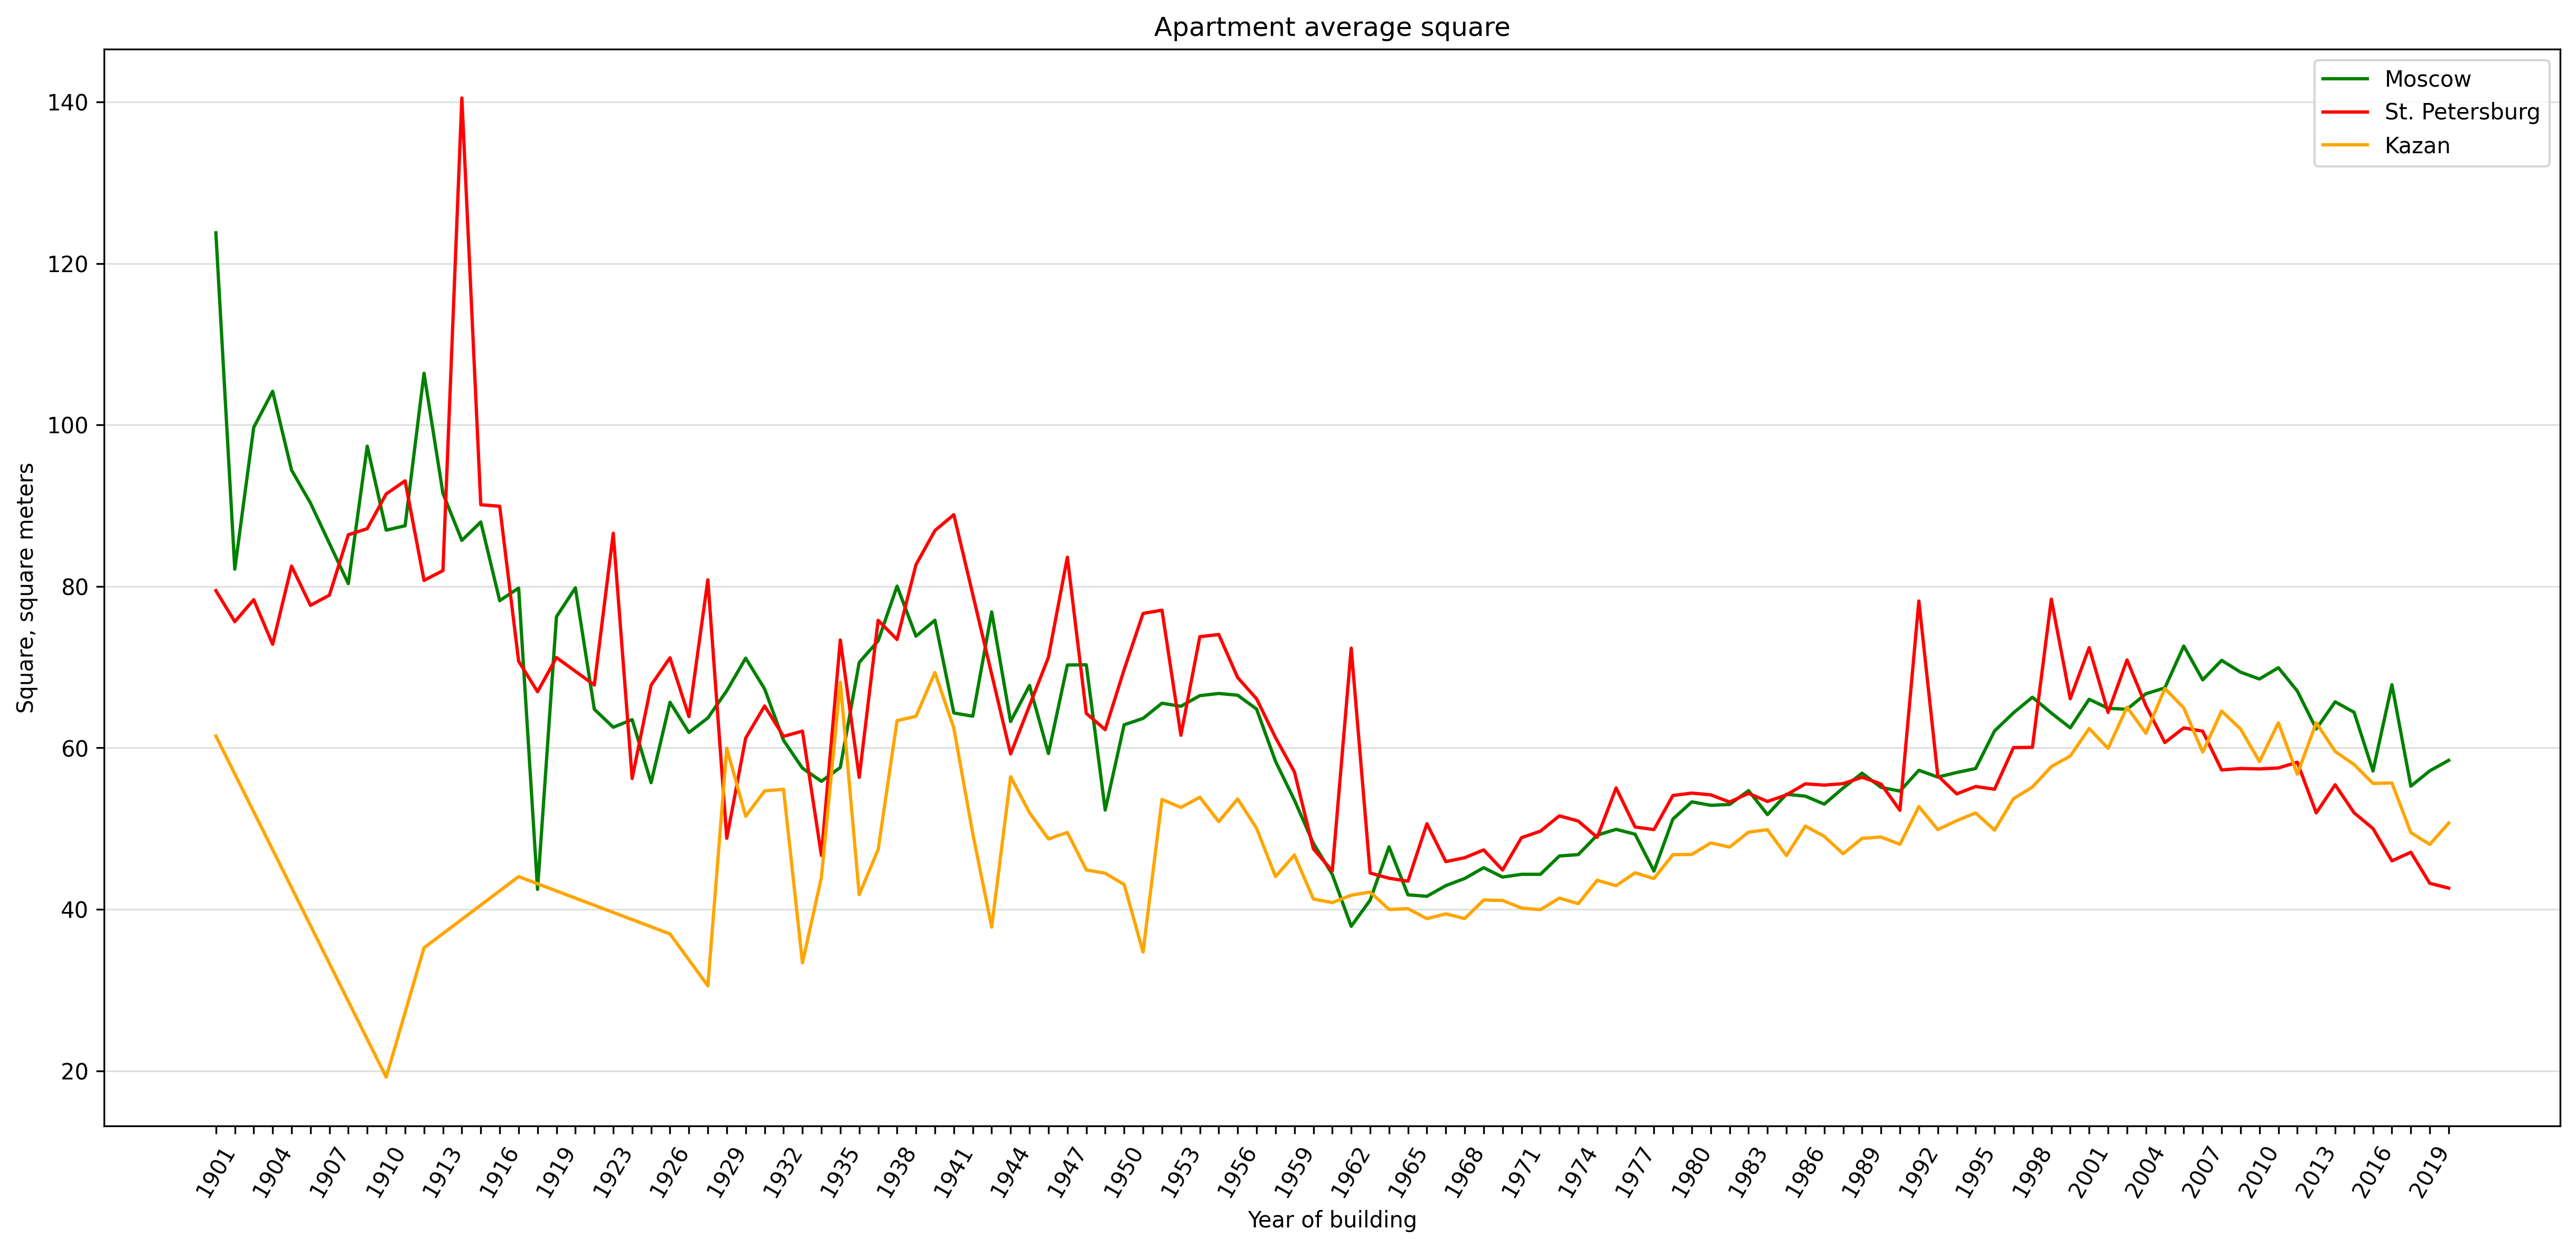

In [18]:
# average apartment square by year distribution

# Moscow
moscow_flat_average_square_list = []
for year in moscow_total_years_names:
  av_sq = sum(df[df.city == 'moscow'].Square.loc[df['Year'] == int(year)]) / sum(df[df.city == 'moscow'].Flats.loc[df['Year'] == int(year)])
  moscow_flat_average_square_list.append(av_sq)

# St Petersburg
spb_flat_average_square_list = []
for year in spb_total_years_names:
  av_sq = sum(df[df.city == 'spb'].Square.loc[df['Year'] == int(year)]) / sum(df[df.city == 'spb'].Flats.loc[df['Year'] == int(year)])
  spb_flat_average_square_list.append(av_sq)

# Kazan
kazan_flat_average_square_list = []
for year in kazan_total_years_names:
  av_sq = sum(df[df.city == 'kazan'].Square.loc[df['Year'] == int(year)]) / sum(df[df.city == 'kazan'].Flats.loc[df['Year'] == int(year)])
  kazan_flat_average_square_list.append(av_sq)

fig, ax = plt.subplots(figsize=(20, 9), dpi = 300)

sns.lineplot(x = moscow_years_list_names, y = moscow_flat_average_square_list,
            color = 'green', label='Moscow')
sns.lineplot(x = spb_years_list_names, y = spb_flat_average_square_list,
            color = 'red', label='St. Petersburg')
sns.lineplot(x = kazan_years_list_names, y = kazan_flat_average_square_list,
            color = 'orange', label='Kazan')

plt.title('Apartment average square')
plt.xlabel('Year of building')
plt.xticks(rotation=60)
plt.ylabel('Square, square meters')
plt.grid(axis = 'y', color = '#dce2dd')
# specify number of ticks on x-axis
every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.savefig('pictures/summary_plot_5.png')
plt.show()

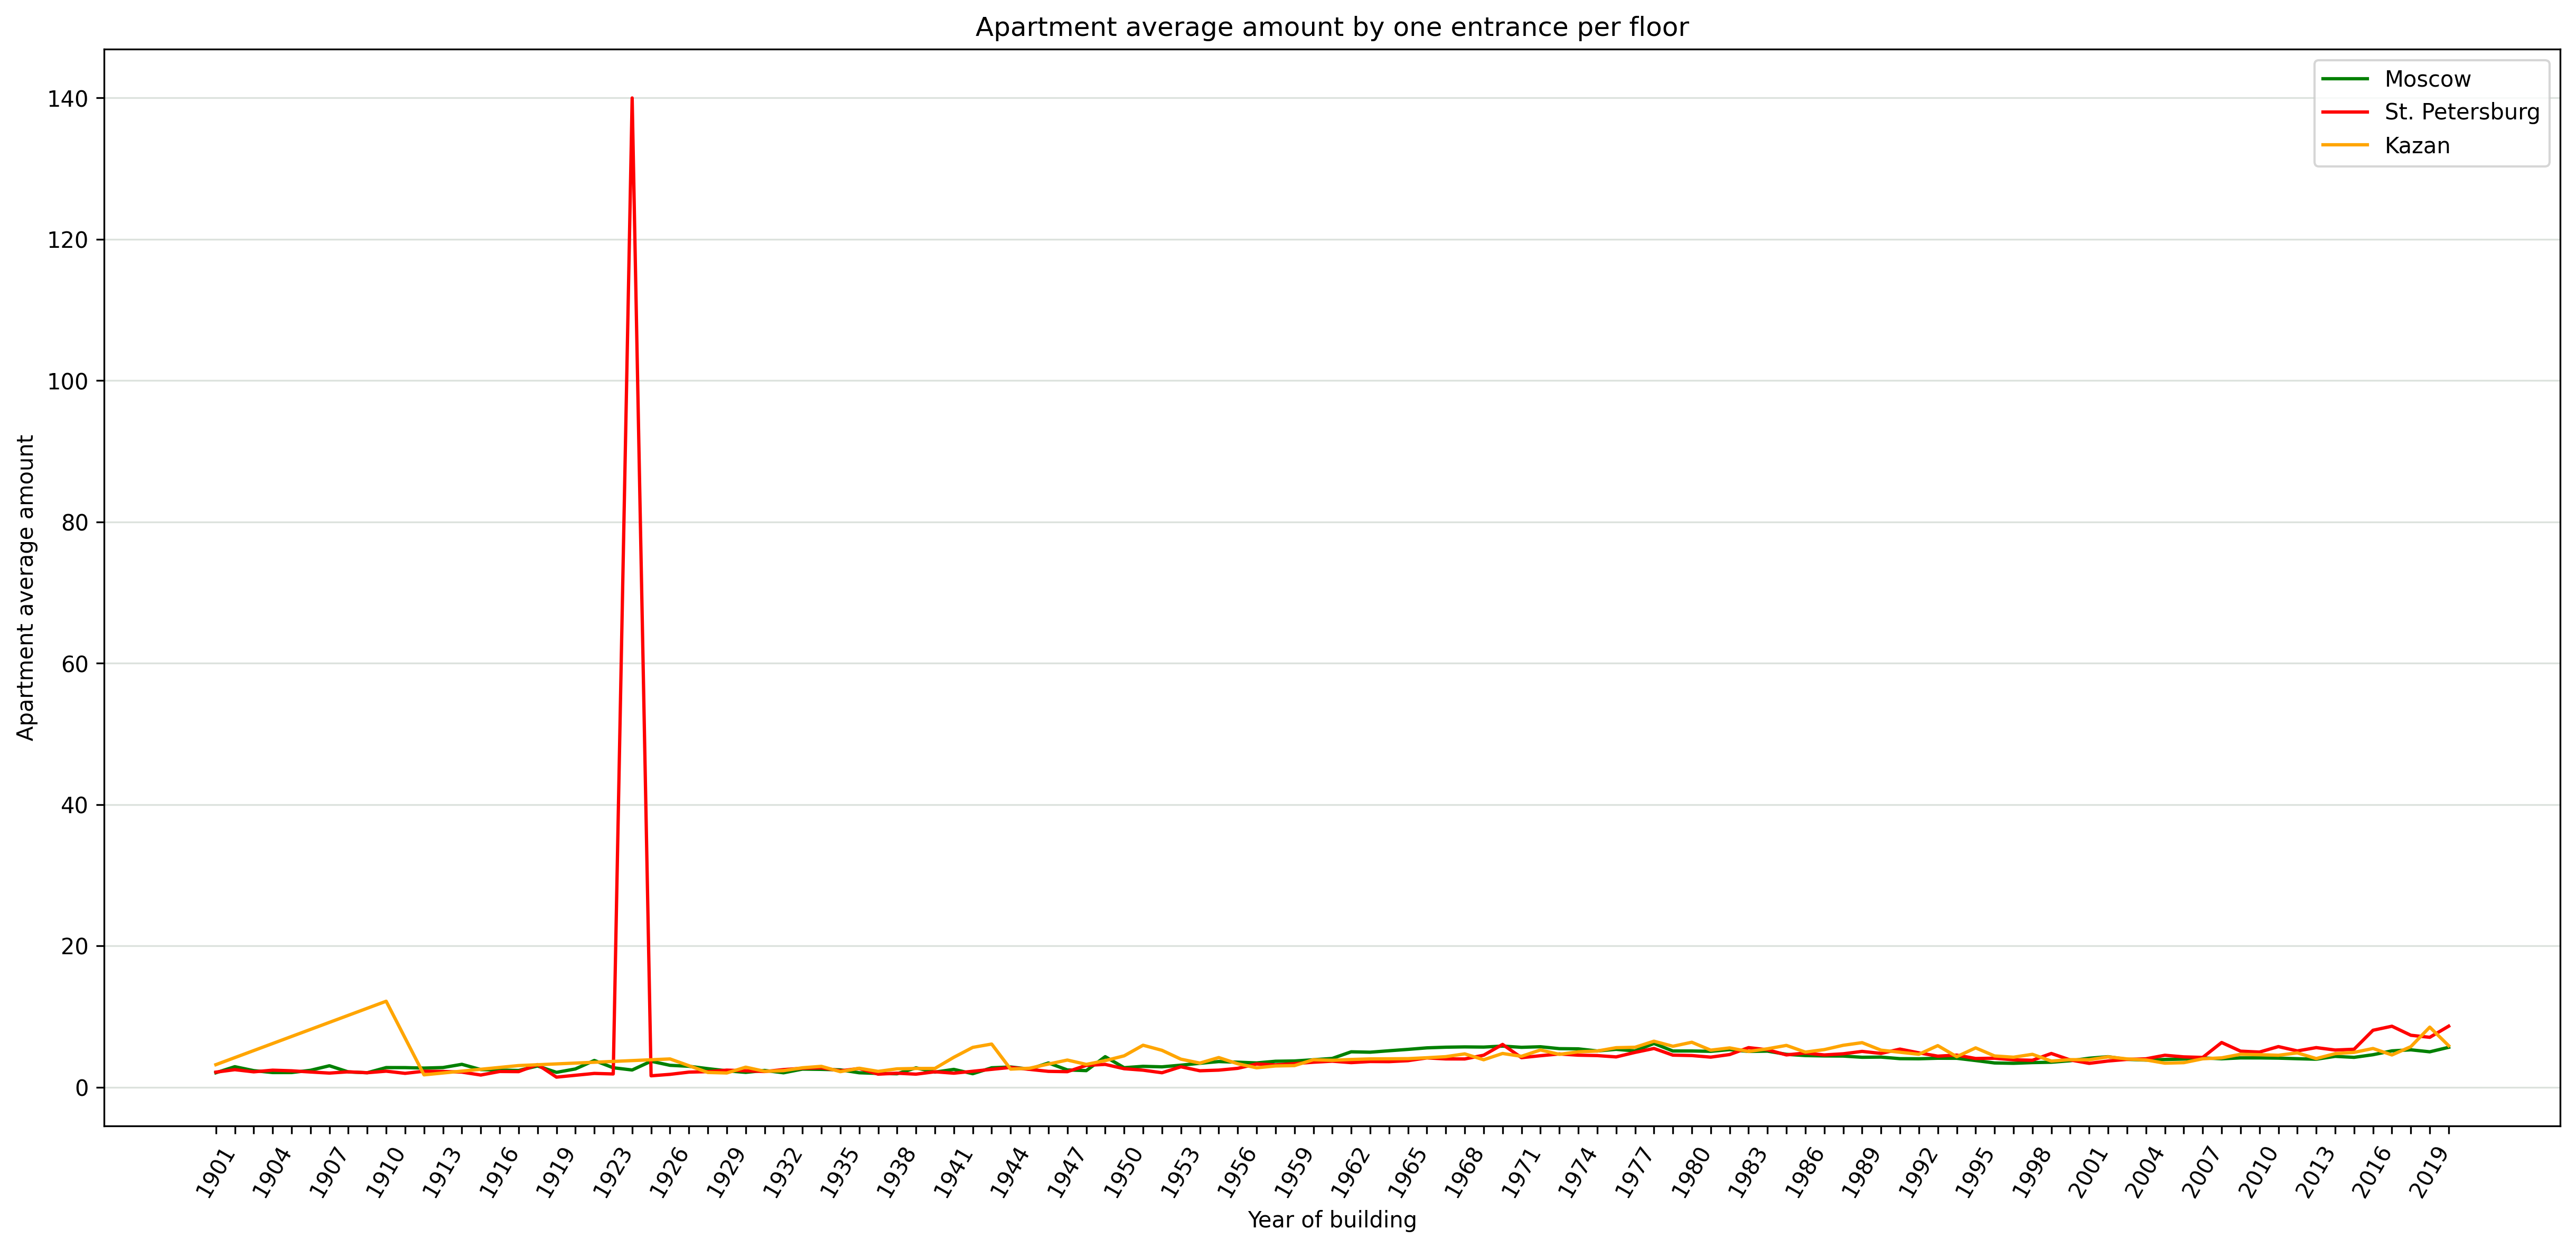

In [19]:
# apartments by one entrance floor count

# Moscow
moscow_flat_floor_list = []
for year in moscow_total_years_names:
  fl_fl = sum(df[df.city == 'moscow'].Flats_per_floor.loc[df['Year'] == int(year)]) / len(df[df.city == 'moscow'].Flats_per_floor.loc[df['Year'] == int(year)])
  moscow_flat_floor_list.append(fl_fl)

# St Petersburg
spb_flat_floor_list = []
for year in spb_total_years_names:
  fl_fl = sum(df[df.city == 'spb'].Flats_per_floor.loc[df['Year'] == int(year)]) / len(df[df.city == 'spb'].Flats_per_floor.loc[df['Year'] == int(year)])
  spb_flat_floor_list.append(fl_fl)

# Kazan
kazan_flat_floor_list = []
for year in kazan_total_years_names:
  fl_fl = sum(df[df.city == 'kazan'].Flats_per_floor.loc[df['Year'] == int(year)]) / len(df[df.city == 'kazan'].Flats_per_floor.loc[df['Year'] == int(year)])
  kazan_flat_floor_list.append(fl_fl)

fig, ax = plt.subplots(figsize=(20, 9), dpi = 300)

sns.lineplot(x = moscow_years_list_names, y = moscow_flat_floor_list,
            color = 'green', label='Moscow')
sns.lineplot(x = spb_years_list_names, y = spb_flat_floor_list,
            color = 'red', label='St. Petersburg')
sns.lineplot(x = kazan_years_list_names, y = kazan_flat_floor_list,
            color = 'orange', label='Kazan')

plt.title('Apartment average amount by one entrance per floor')
plt.xlabel('Year of building')
plt.xticks(rotation=60)
plt.ylabel('Apartment average amount')
plt.grid(axis = 'y', color = '#dce2dd')
# specify number of ticks on x-axis
every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.savefig('pictures/summary_plot_6.png')
plt.show()

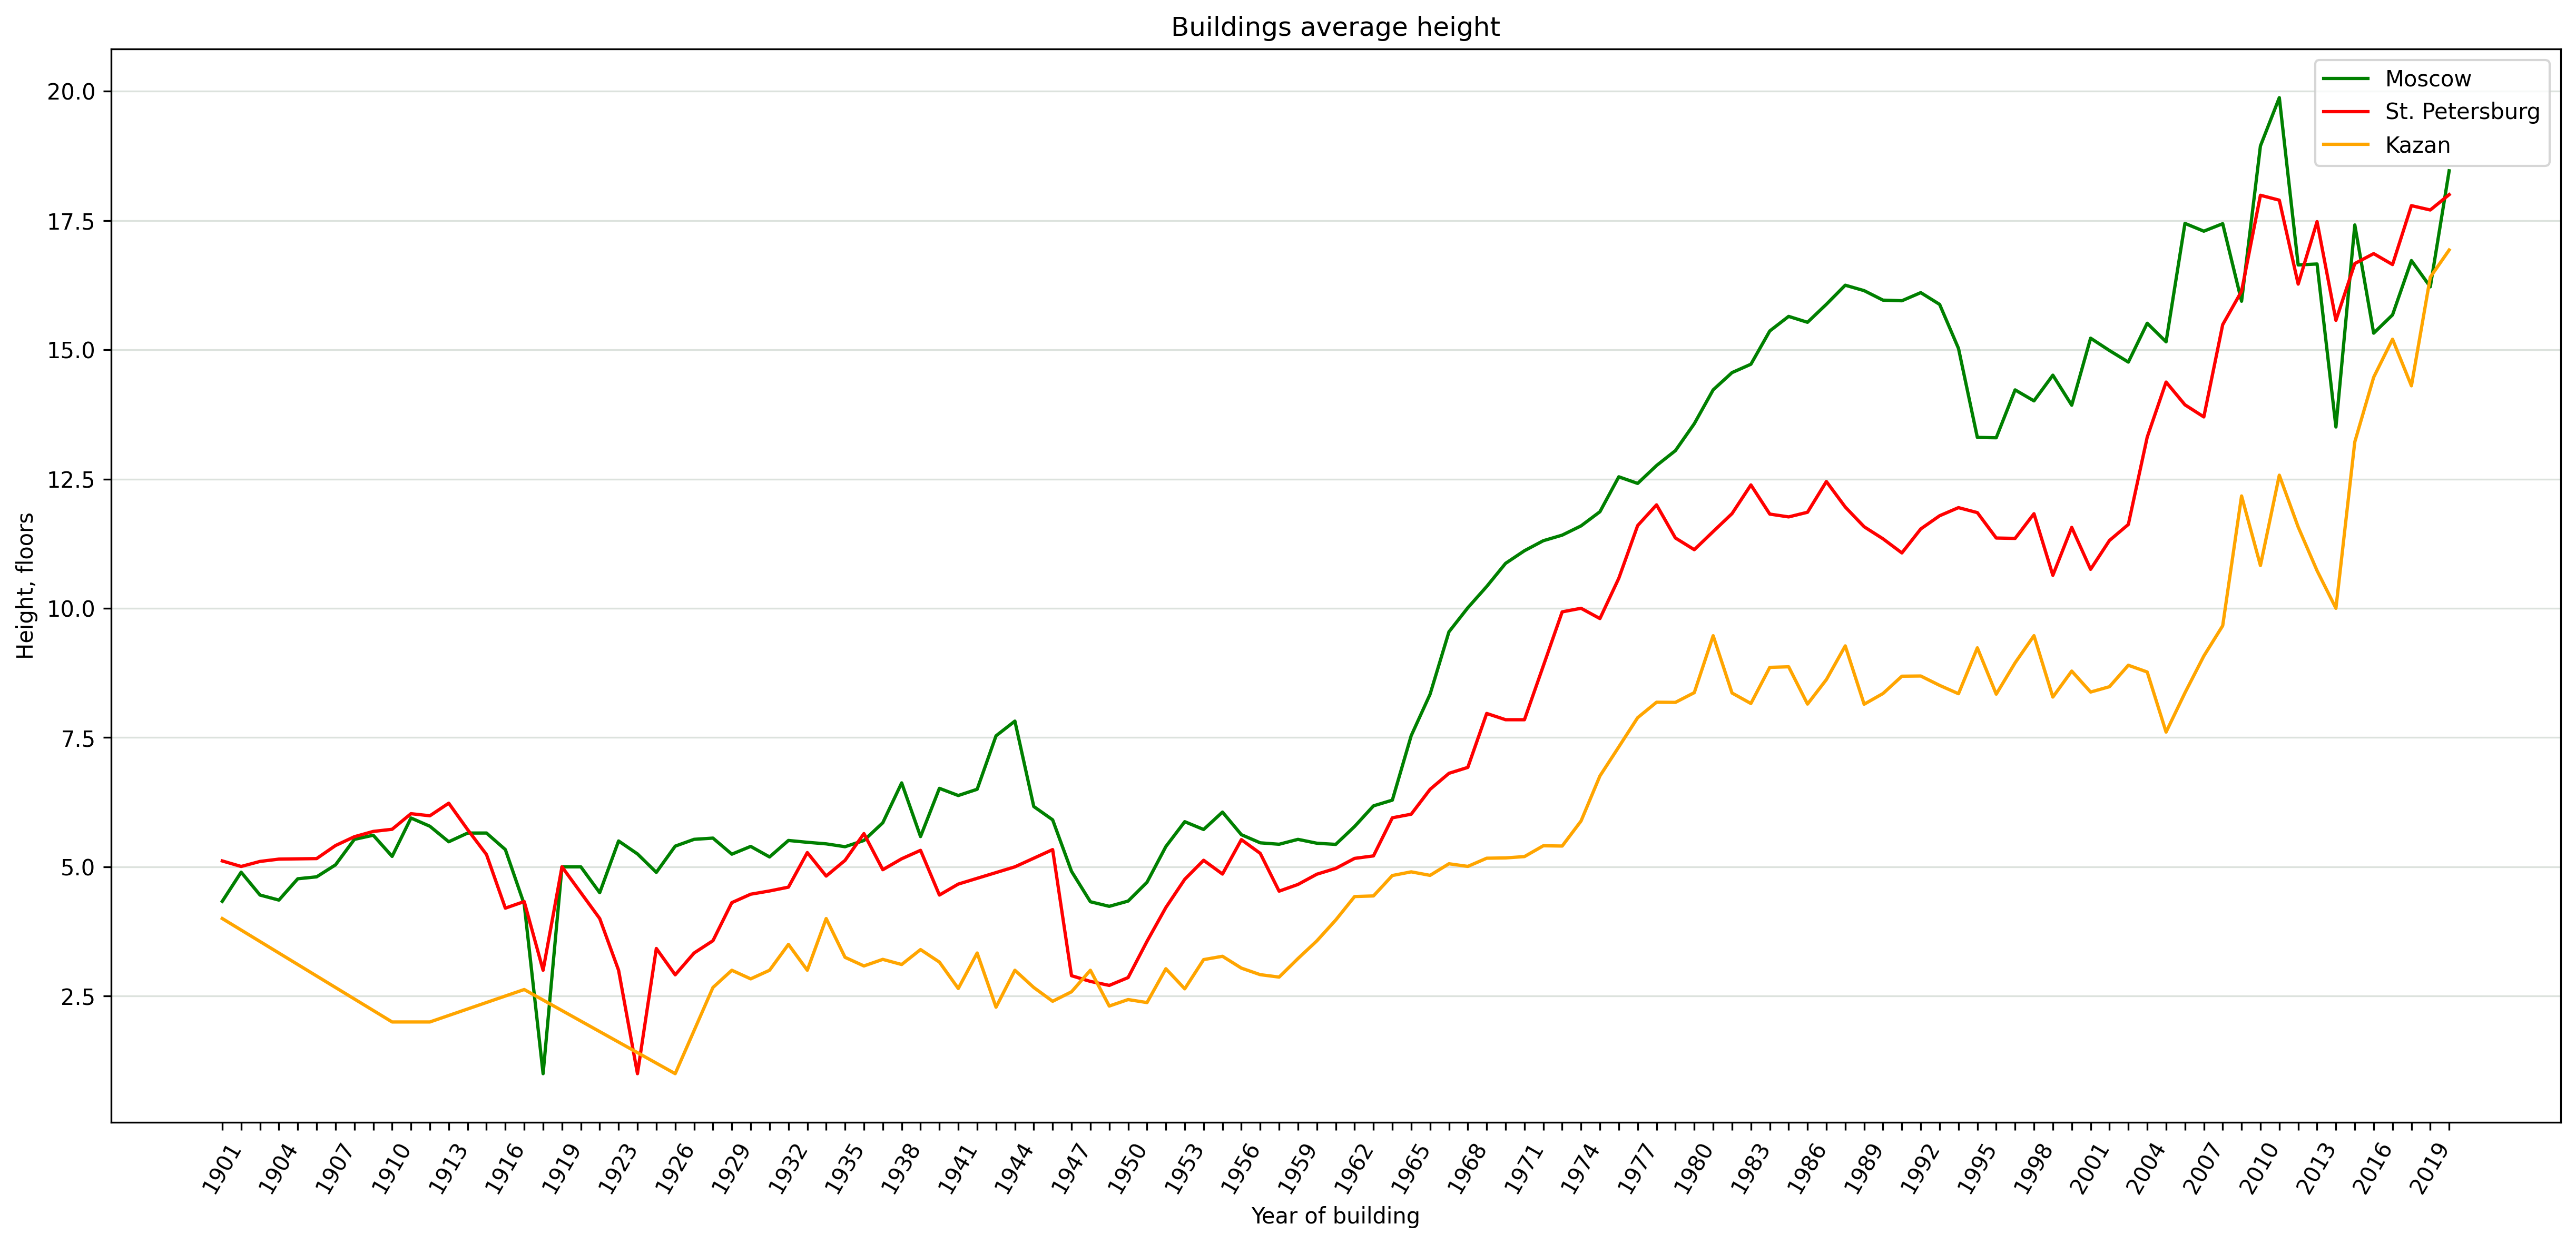

In [20]:
# the average high building by the years

# Moscow
moscow_average_height_list = []

for year in moscow_total_years_names:
  av_height = sum(df[df.city == 'moscow'].Height.loc[df['Year'] == int(year)]) / len(df[df.city == 'moscow'].Height.loc[df['Year'] == int(year)])
  moscow_average_height_list.append(av_height)

# St Petersburg
spb_average_height_list = []

for year in spb_total_years_names:
  av_height = sum(df[df.city == 'spb'].Height.loc[df['Year'] == int(year)]) / len(df[df.city == 'spb'].Height.loc[df['Year'] == int(year)])
  spb_average_height_list.append(av_height)

# Kazan
kazan_average_height_list = []

for year in kazan_total_years_names:
  av_height = sum(df[df.city == 'kazan'].Height.loc[df['Year'] == int(year)]) / len(df[df.city == 'kazan'].Height.loc[df['Year'] == int(year)])
  kazan_average_height_list.append(av_height)


fig, ax = plt.subplots(figsize=(20, 9), dpi = 300)

sns.lineplot(x = moscow_years_list_names, y = moscow_average_height_list,
            color = 'green', label='Moscow')
sns.lineplot(x = spb_years_list_names, y = spb_average_height_list,
            color = 'red', label='St. Petersburg')
sns.lineplot(x = kazan_years_list_names, y = kazan_average_height_list,
            color = 'orange', label='Kazan')

plt.title('Buildings average height')
plt.xlabel('Year of building')
plt.xticks(rotation=60)
plt.ylabel('Height, floors')
plt.grid(axis = 'y', color = '#dce2dd')
# specify number of ticks on x-axis
every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.savefig('pictures/summary_plot_7.png')
plt.show()

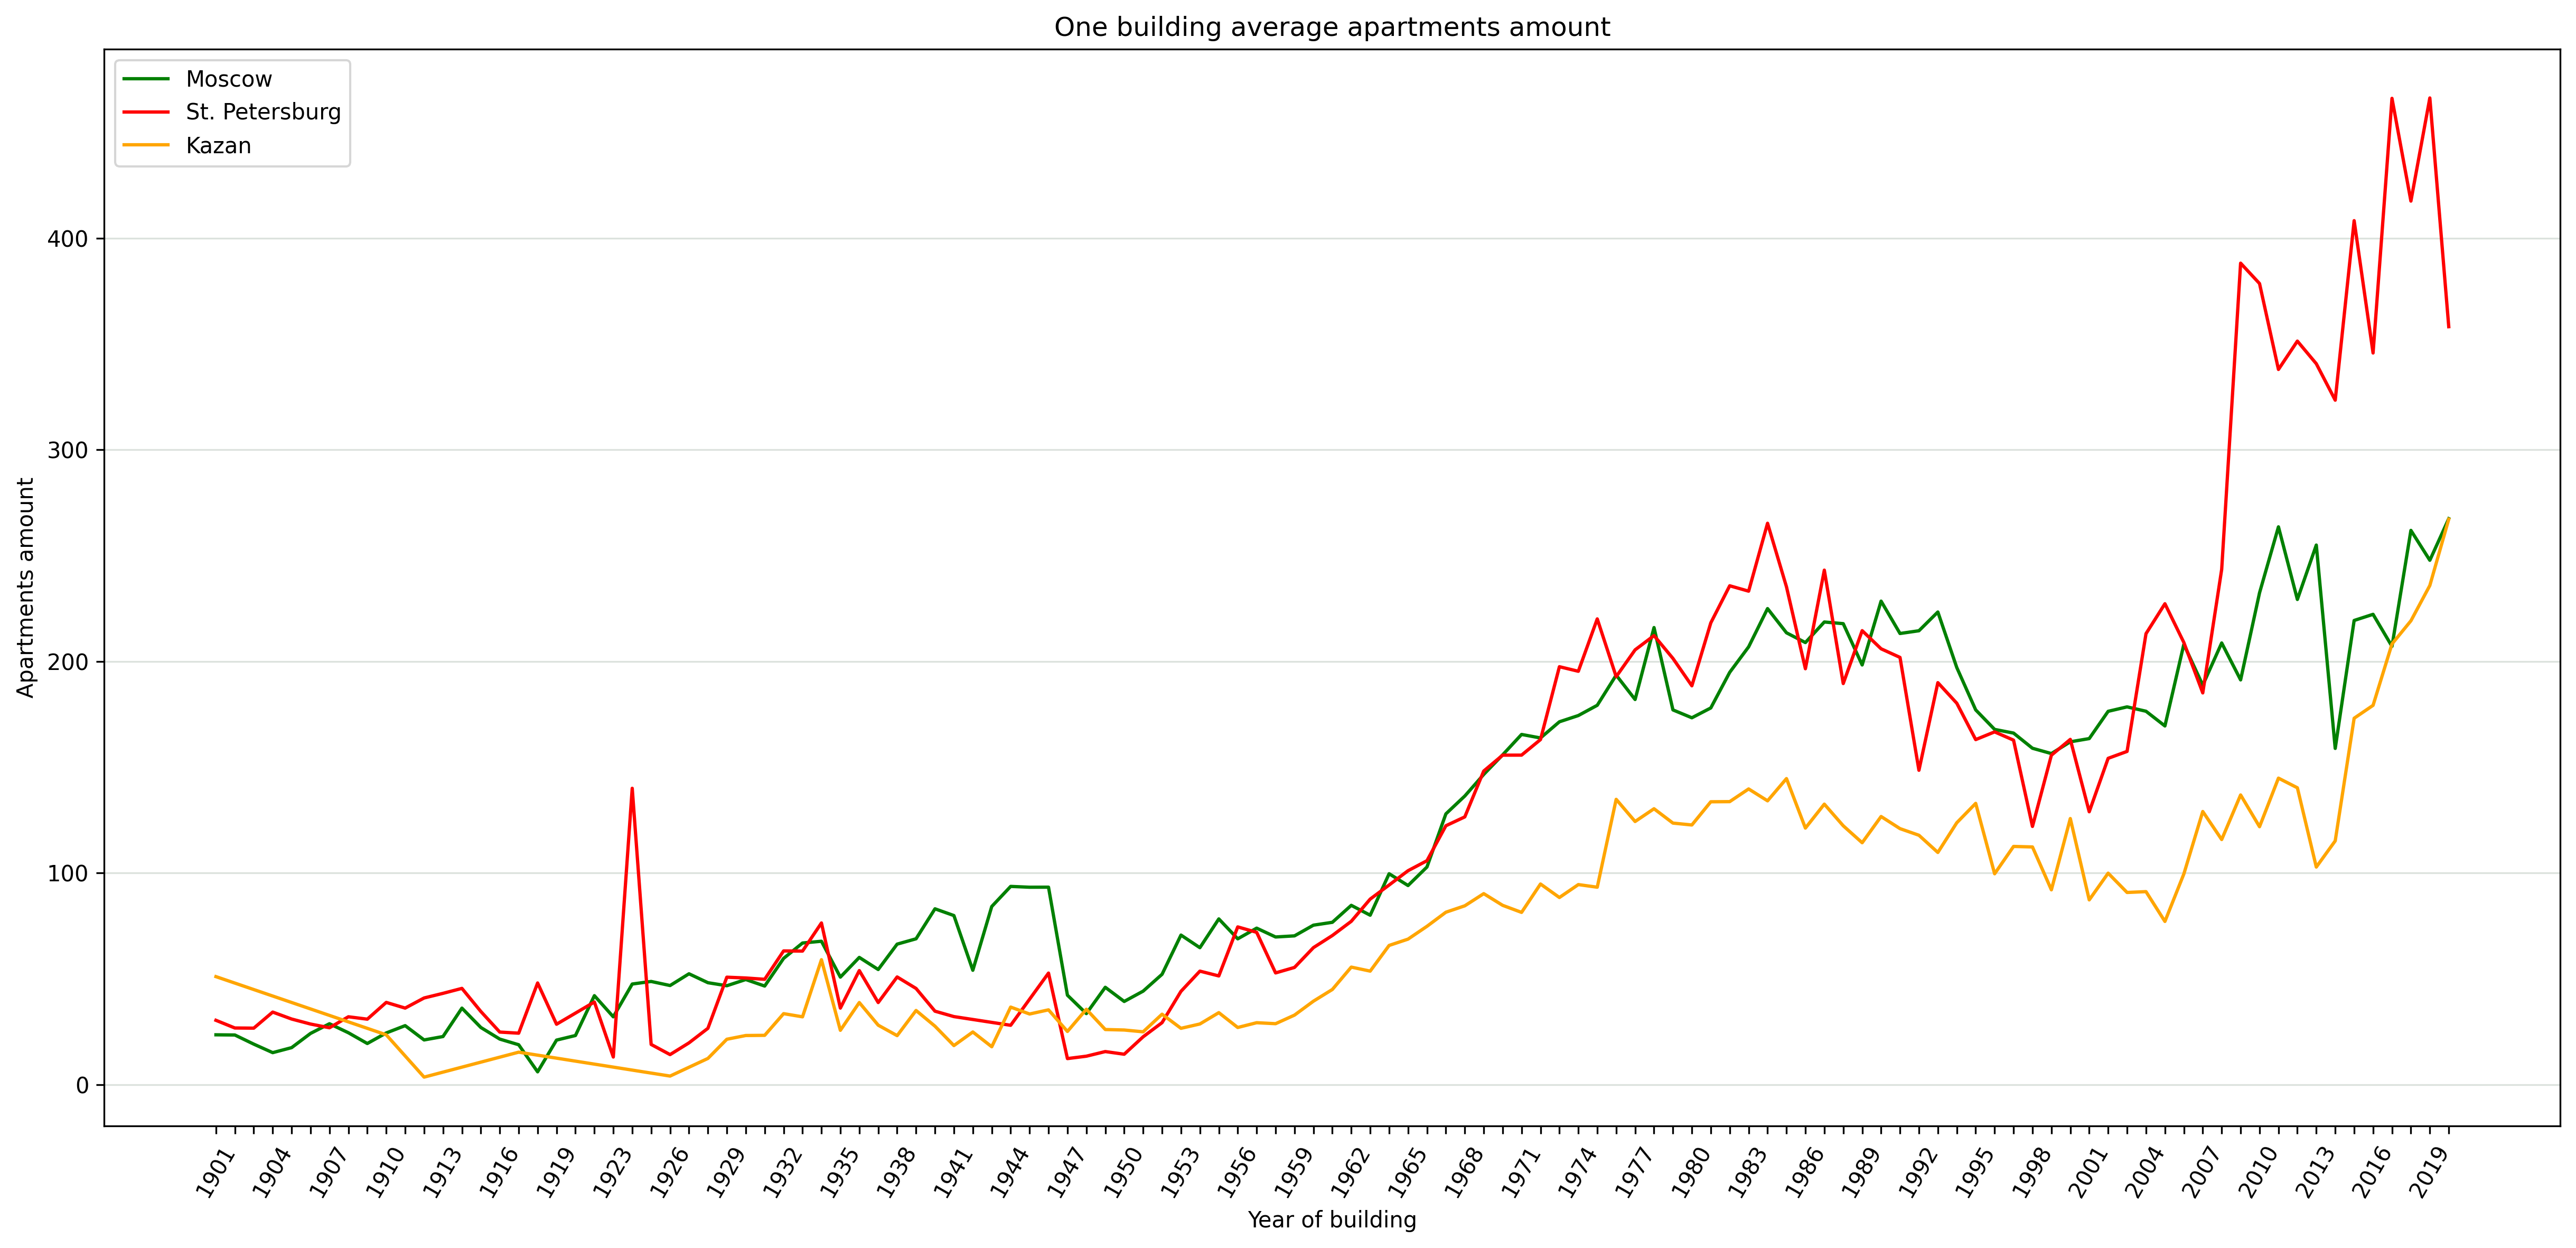

In [21]:
# average apartments amount in 1 building for every year

# Moscow
moscow_average_flats_list = []
for year in moscow_total_years_names:
  build_list = df[df.city == 'moscow'].Flats[df.Year == int(year)].values
  average_flats_value = sum(build_list) / len(build_list)
  moscow_average_flats_list.append(average_flats_value)

# St Petersburg
spb_average_flats_list = []
for year in spb_total_years_names:
  build_list = df[df.city == 'spb'].Flats[df.Year == int(year)].values
  average_flats_value = sum(build_list) / len(build_list)
  spb_average_flats_list.append(average_flats_value)

# Kazan
kazan_average_flats_list = []
for year in kazan_total_years_names:
  build_list = df[df.city == 'kazan'].Flats[df.Year == int(year)].values
  average_flats_value = sum(build_list) / len(build_list)
  kazan_average_flats_list.append(average_flats_value)


fig, ax = plt.subplots(figsize=(20, 9), dpi = 300)

sns.lineplot(x = moscow_years_list_names, y = moscow_average_flats_list,
            color = 'green', label= 'Moscow')
sns.lineplot(x = spb_years_list_names, y = spb_average_flats_list,
            color = 'red', label= 'St. Petersburg')
sns.lineplot(x = kazan_years_list_names, y = kazan_average_flats_list,
            color = 'orange', label= 'Kazan')

plt.title('One building average apartments amount')
plt.xlabel('Year of building')
plt.xticks(rotation=60)
plt.ylabel('Apartments amount')
plt.grid(axis = 'y', color = '#dce2dd')
# specify number of ticks on x-axis
every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.savefig('pictures/summary_plot_8.png')
plt.show()